<a href="https://colab.research.google.com/github/marcelorandolfo/medium/blob/master/avaliacao_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparação

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# estilo notebook
sns.set()

# url dos datasets
url_path = 'https://raw.githubusercontent.com/marcelorandolfo/data-science/master/data/heart_disease_processed.csv'

# importar dataset da UCI
df = pd.read_csv(url_path)

# visualizar as primeiras 5 entradas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
# obtendo o tamanho do dataframe

print('Número de entradas/pacientes:\t {}'.format(df.shape[0]))
print('Número de variáveis/atributos pessoais e médicos:\t {}'.format(df.shape[1]))

Número de entradas/pacientes:	 297
Número de variáveis/atributos pessoais e médicos:	 14


In [3]:
pd.options.mode.chained_assignment = None
# criando dataset auxiliar
df_aux = df.tail(10)

# eliminando valores de df_teste do dataset original
df_model = df.drop(index = df_aux.index)

# arrumando index de df_teste
df_aux.reset_index(inplace = True)
df_aux.drop('index', axis = 1, inplace = True)

# obtendo o novo tamanho do dataframe
print('DataFrame principal:\n')
print('Número de entradas/pacientes:\t {}'.format(df_model.shape[0]))
print('Número de variáveis/atributos pessoais e médicos:\t {}\n'.format(df_model.shape[1]))

# obtendo o tamanho do dataframe auxiliar
print('DataFrame de teste:\n')
print('Número de entradas/pacientes:\t {}'.format(df_aux.shape[0]))
print('Número de variáveis/atributos pessoais e médicos:\t {}'.format(df_aux.shape[1]))

DataFrame principal:

Número de entradas/pacientes:	 287
Número de variáveis/atributos pessoais e médicos:	 14

DataFrame de teste:

Número de entradas/pacientes:	 10
Número de variáveis/atributos pessoais e médicos:	 14


In [4]:
df_model.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df_aux.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0,1
1,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,1
2,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
3,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
4,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,1


In [6]:
print('Proporção de pacientes diagnosticados como não tendo doença cardíaca:\t {:.2f}%'.format(((df_model['num'].value_counts()[0]/df_model.shape[0])*100).round(2)))
print('Proporção de pacientes diagnosticados como tendo doença cardíaca:\t {:.2f}%'.format(((df_model['num'].value_counts()[1]/df_model.shape[0])*100).round(2)))

Proporção de pacientes diagnosticados como não tendo doença cardíaca:	 55.40%
Proporção de pacientes diagnosticados como tendo doença cardíaca:	 44.60%


### Erros

In [7]:
from sklearn.model_selection import train_test_split

X = df_model.drop('num', axis = 1)
y = df_model['num']

SEED = 42
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print('O dataset de treino possui {} pacientes e o de treino {} pacientes.'.format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 229 pacientes e o de treino 58 pacientes.


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 79.31%.


In [9]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 82.76%.


In [10]:
X_news = df_aux.drop('num', axis = 1)
y_news = df_aux['num']

predict = model.predict(X_news)

accuracy = accuracy_score(y_news, predict) * 100
print ("A acurácia foi de {:.2f}%.".format(accuracy))

A acurácia foi de 60.00%.


### Primeiro passo

In [11]:
# divisao entre treino e teste do dataframe original
from sklearn.model_selection import train_test_split

SEED = 23
np.random.seed(SEED)

X = df.drop('num', axis = 1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

print('O dataset de treino possui {} pacientes e o de treino {} pacientes.'.format(X_train.shape[0], X_test.shape[0]))

O dataset de treino possui 237 pacientes e o de treino 60 pacientes.


### Segundo passo

In [12]:
from sklearn.model_selection import cross_val_score

SEED = 42
np.random.seed(SEED)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')


def intervalo(results):
  mean = results.mean()
  dv = results.std()
  print('Acurácia média: {:.2f}%'.format(mean*100))
  print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo(results)

Acurácia média: 74.66%
Intervalo de acurácia: [67.38% ~ 81.95%]


In [13]:
from sklearn.model_selection import KFold

np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 72.57%
Intervalo de acurácia: [62.50% ~ 82.64%]


In [14]:
from sklearn.model_selection import StratifiedKFold

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 75.97%
Intervalo de acurácia: [71.26% ~ 80.67%]


### Terceiro passo

#### Hiperparâmetros

In [15]:
max_depth = [3, 2, 4]

for item in max_depth:
  np.random.seed(SEED)
  cv = StratifiedKFold(n_splits = 5, shuffle = True)
  model = DecisionTreeClassifier(max_depth=item)
  results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Max Depth {}: {:.2f}%'.format(item, mean*100))
  print('Intervalo de acurácia - Max Depth {}: [{:.2f}% ~ {:.2f}%]\n'.format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))

Acurácia média - Max Depth 3: 75.97%
Intervalo de acurácia - Max Depth 3: [71.26% ~ 80.67%]

Acurácia média - Max Depth 2: 74.74%
Intervalo de acurácia - Max Depth 2: [61.41% ~ 88.08%]

Acurácia média - Max Depth 4: 73.44%
Intervalo de acurácia - Max Depth 4: [62.86% ~ 84.02%]



#### Modelos

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = DecisionTreeClassifier(max_depth=3)
model_svc = SVC()
model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)

models = [model, model_svc, model_log, model_rand]
name = ['Árvore de Decisão', 'SVC', 'Regressão Logística', 'Random Forest']

count = 0
for item in models:
  np.random.seed(SEED)
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
  print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
  count += 1


Acurácia média - Modelo Árvore de Decisão: 75.97%
Intervalo de acurácia - Modelo Árvore de Decisão: [71.26% ~ 80.67%]

Acurácia média - Modelo SVC: 67.52%
Intervalo de acurácia - Modelo SVC: [56.79% ~ 78.25%]

Acurácia média - Modelo Regressão Logística: 84.85%
Intervalo de acurácia - Modelo Regressão Logística: [74.00% ~ 95.70%]

Acurácia média - Modelo Random Forest: 83.15%
Intervalo de acurácia - Modelo Random Forest: [72.41% ~ 93.89%]



### Quarto passo

#### Precisão

In [17]:
def intervalo_prec(results):
  mean = results.mean()
  dv = results.std()
  print('Precisão média: {:.2f}%'.format(mean*100))
  print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'precision')
intervalo_prec(results)

Precisão média: 86.16%
Intervalo de Precisão: [74.66% ~ 97.65%]


#### Recall

In [18]:
def intervalo_recall(results):
  mean = results.mean()
  dv = results.std()
  print('Recall médio: {:.2f}%'.format(mean*100))
  print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2*dv)*100, (mean + 2*dv)*100))

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall')
intervalo_recall(results)

Recall médio: 79.91%
Intervalo de Recall: [64.30% ~ 95.53%]


#### Trade-off: precisão x recall

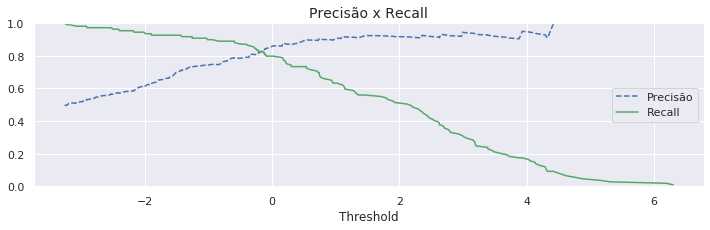

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')
y_scores = cross_val_predict(model, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,3))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)

plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_recall_90 = (y_scores > -2)

print('Nova precisão: {:.4f}'.format(precision_score(y_train,y_train_pred_recall_90)))
print('Novo recall: {:.4f}'.format(recall_score(y_train,y_train_pred_recall_90)))

Nova precisão: 0.6145
Novo recall: 0.9358


#### Matriz de confusão e relatório de classificação

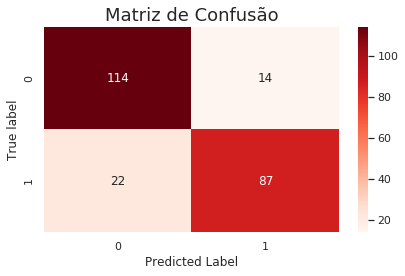

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')
y_pred = cross_val_predict(model, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()


In [22]:
from sklearn.metrics import classification_report

# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.8382    0.8906    0.8636       128
           1     0.8614    0.7982    0.8286       109

    accuracy                         0.8481       237
   macro avg     0.8498    0.8444    0.8461       237
weighted avg     0.8489    0.8481    0.8475       237



#### Curva ROC

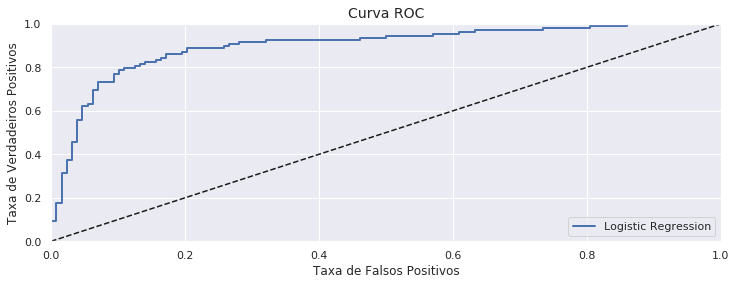

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,4))

plt.plot(fpr, tpr, linewidth=2, label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

In [24]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(y_train, y_scores)))

Área sob a curva ROC: 0.8997


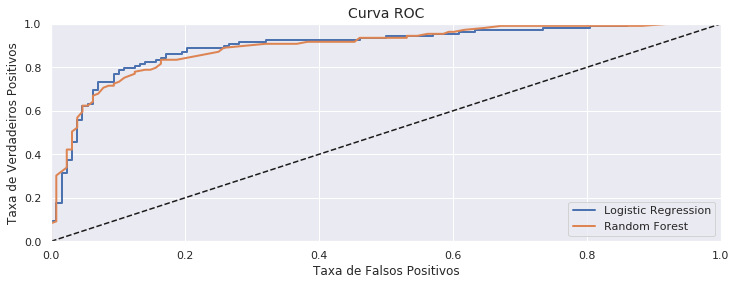

Área sob a curva ROC - Logistic Regression: 0.8997
Área sob a curva ROC - Random Forest: 0.8956


In [25]:
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_rf = RandomForestClassifier(n_estimators=100)
y_prob_forest = cross_val_predict(model_rf, X_train, y_train, cv = cv, method = 'predict_proba')

y_scores_forest = y_prob_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

fig, ax = plt.subplots(figsize = (12,4))

plt.plot(fpr, tpr, linewidth=2, label = 'Logistic Regression')
plt.plot(fpr_forest, tpr_forest, linewidth=2, label = 'Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)

plt.show()

print('Área sob a curva ROC - Logistic Regression: {:.4f}'.format(roc_auc_score(y_train, y_scores)))
print('Área sob a curva ROC - Random Forest: {:.4f}'.format(roc_auc_score(y_train, y_scores_forest)))

### Quinto passo

### Sexto passo

In [26]:
np.random.seed(SEED)

final_model = LogisticRegression(solver='liblinear')
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.7561    0.9688    0.8493        32
           1     0.9474    0.6429    0.7660        28

    accuracy                         0.8167        60
   macro avg     0.8517    0.8058    0.8076        60
weighted avg     0.8454    0.8167    0.8104        60

AUC: 0.8873



In [27]:
y_scores_final = final_model.decision_function(X_test)
y_test_pred_recall_90 = (y_scores_final > -2)

print('Nova precisão: {:.4f}'.format(precision_score(y_test,y_test_pred_recall_90)))
print('Novo recall: {:.4f}'.format(recall_score(y_test,y_test_pred_recall_90)))

Nova precisão: 0.6429
Novo recall: 0.9643


### Sétimo passo

In [0]:
np.random.seed(SEED)

deploy_model = LogisticRegression(solver='liblinear')
deploy_model.fit(X, y)

def previsao_threshold(data, threshold = -2):
  y_previsao = deploy_model.decision_function(data)
  y_threshold = (y_previsao > threshold)
  print(y_previsao)
  print(y_threshold)
  if threshold == True:
    print('Paciente diagnosticado com doença cardíaca.')
  else:
    print('Paciente liberado')